In [40]:
"""Objective was to recreate images of famous people using a Gaussian Mixture model. 
PCA was used prior to GM to reduce the computational expense."""

import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [34]:
faces = fetch_lfw_people()
common = fetch_lfw_people(min_faces_per_person=30)
common.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Andre Agassi', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Colin Powell', 'David Beckham',
       'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Guillermo Coria', 'Hans Blix',
       'Hugo Chavez', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Capriati', 'John Ashcroft', 'John Negroponte',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush', 'Lleyton Hewitt',
       'Luiz Inacio Lula da Silva', 'Megawati Sukarnoputri',
       'Nestor Kirchner', 'Recep Tayyip Erdogan', 'Roh Moo-hyun',
       'Serena Williams', 'Silvio Berlusconi', 'Tom Ridge', 'Tony Blair',
       'Vicente Fox', 'Vladimir Putin'],
      dtype='<U25')

In [35]:
def face_generator(name, pca_variance=0.9):
    """generate new images of famous people in LFW dataset
    using PCA and a Gaussian Mixture algorithm"""
    images = faces.data[faces.target_names[faces.target] == name]
    fig, axes = plt.subplots(5,5,figsize=(12,12),gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(62,47))
        ax.set(xticks=[],yticks=[])
        ax.set_title("Original")
   
    pca = PCA(pca_variance, whiten=True)
    pcaimages = pca.fit_transform(images)
    
    n_components = np.arange(1,images.shape[0],2)
    models = [GaussianMixture(n, random_state=44) for n in n_components]
    aics = [model.fit(pcaimages).aic(pcaimages) for model in models]
    gauss = GaussianMixture(n_components[np.argmin(aics)], random_state=1)
    gauss.fit(pcaimages)
    data_new = gauss.sample(25)
    digits_new = pca.inverse_transform(data_new[0])
    fig, axes = plt.subplots(5,5,figsize=(12,12),gridspec_kw=dict(hspace=0.1,wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(digits_new[i].reshape(62,47))
        ax.set(xticks=[],yticks=[])
        ax.set_title("Generated Image")




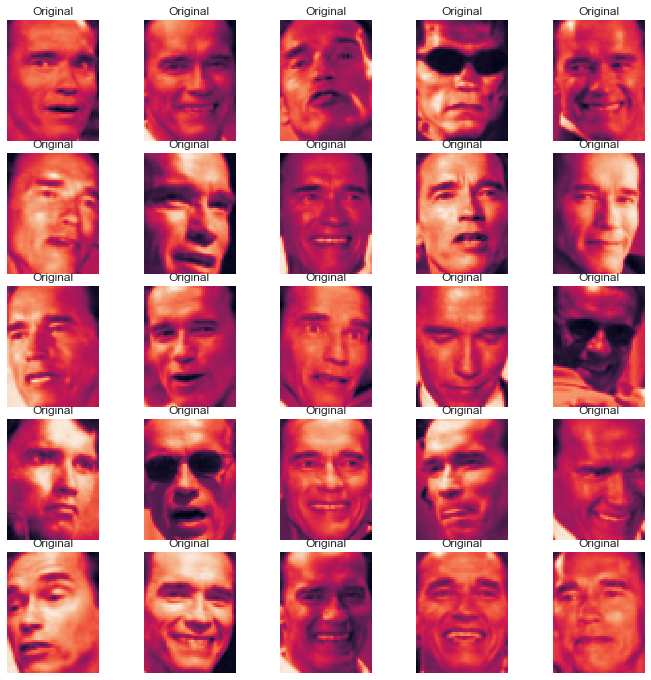

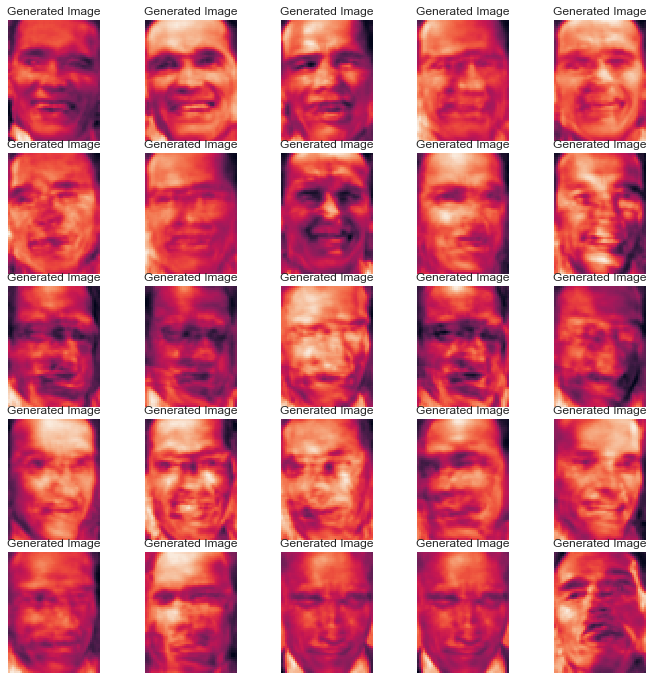

In [36]:
#Let's try it on Arnie

face_generator('Arnold Schwarzenegger')

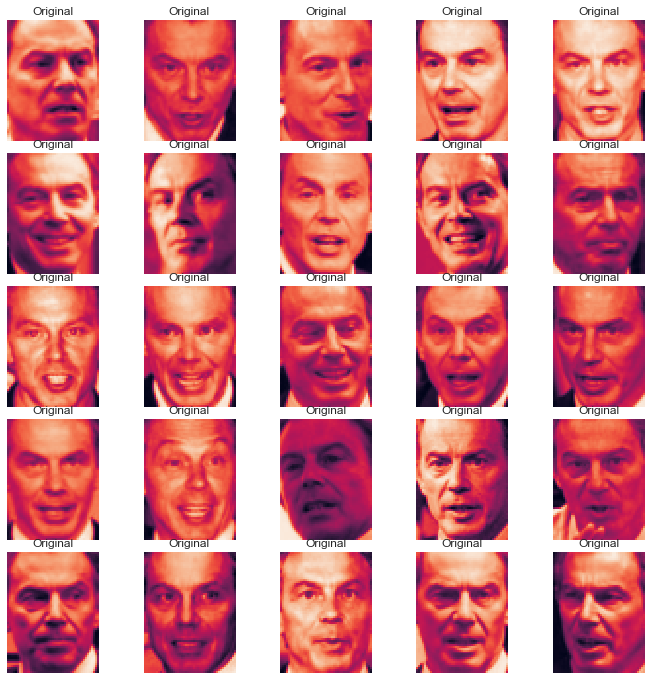

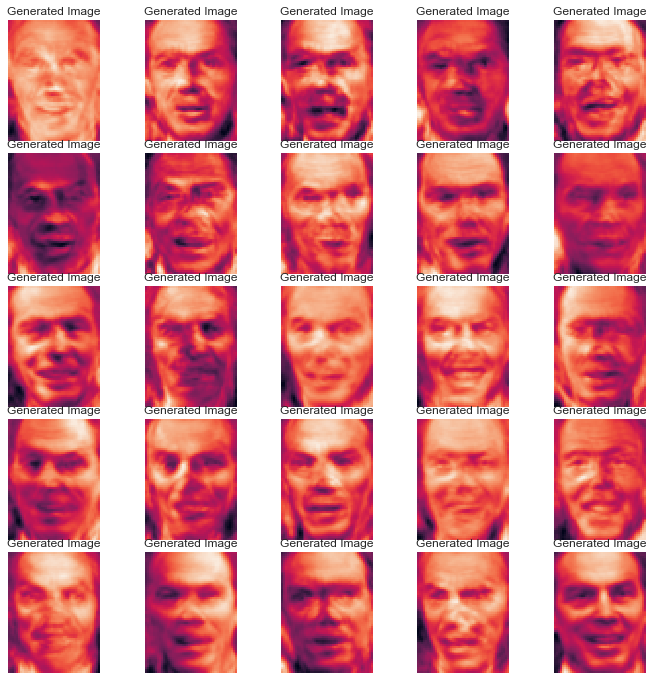

In [37]:
#and the main event:

face_generator('Tony Blair')